In [1]:
import os, sys
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

HOME = os.getenv("HOME")
DATA_DIR = HOME + '/data/mnist/'



In [3]:
#One way to show an image
r = np.random.rand(28, 28, 3)
img = Image.fromarray(r, 'RGB')
img.show()

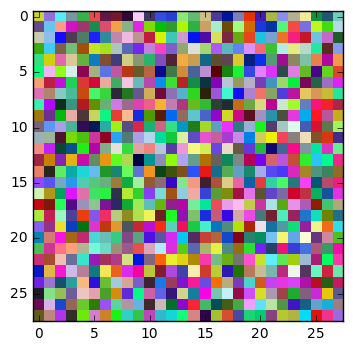

In [4]:
#another way
plt.imshow(r, interpolation='nearest')
plt.show()

# Data Prep and Exploration

In [5]:
train = pd.read_csv(DATA_DIR + 'train.csv')

In [21]:
from keras.utils.np_utils import to_categorical

split_ind = int(0.8 * train.shape[0])
X = train.iloc[:, 1:].values / 255.0
X_reshape = np.reshape(X, (X.shape[0], 1, 28, 28))
X_train = X_reshape[:split_ind, :]
X_val = X_reshape[split_ind:, :] 
Y_train = train.iloc[:split_ind, 0].values
Y_val = train.iloc[split_ind:, 0].values
y_train_ohe = to_categorical(Y_train)
y_val_ohe = to_categorical(Y_val)

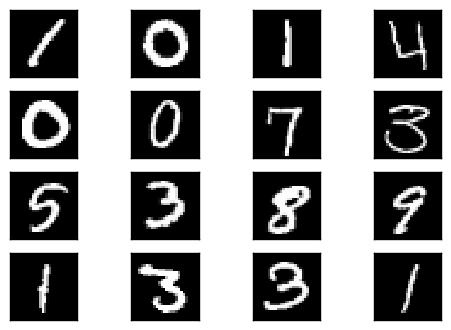

In [7]:
#plot the first few number images
s = 16
X_plot = np.reshape(X, (X.shape[0], 28, 28))
fig = plt.figure()
for i in range(16):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(X_plot[i] * 255.0, interpolation='nearest', cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

# Build the network

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

## Simple Conv2 Network

In [22]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode = 'same', input_shape = (1, 28, 28), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = None))
model.add(Flatten())

model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',  loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train_ohe, batch_size = 128, nb_epoch = 10, validation_data = (X_val, y_val_ohe))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 3s - loss: 0.4579 - acc: 0.8793 - val_loss: 0.2171 - val_acc: 0.9355
Epoch 2/10
33600/33600 [==============================] - 2s - loss: 0.1783 - acc: 0.9499 - val_loss: 0.1426 - val_acc: 0.9605
Epoch 3/10
33600/33600 [==============================] - 2s - loss: 0.1161 - acc: 0.9678 - val_loss: 0.1187 - val_acc: 0.9639
Epoch 4/10
33600/33600 [==============================] - 2s - loss: 0.0896 - acc: 0.9748 - val_loss: 0.0899 - val_acc: 0.9729
Epoch 5/10
33600/33600 [==============================] - 2s - loss: 0.0743 - acc: 0.9795 - val_loss: 0.0820 - val_acc: 0.9738
Epoch 6/10
33600/33600 [==============================] - 2s - loss: 0.0648 - acc: 0.9820 - val_loss: 0.0789 - val_acc: 0.9760
Epoch 7/10
33600/33600 [==============================] - 2s - loss: 0.0573 - acc: 0.9844 - val_loss: 0.0689 - val_acc: 0.9785
Epoch 8/10
33600/33600 [==============================] - 2s -

## Purely Dense network

In [23]:
model = Sequential()
model.add(Dense(4096, activation='relu', input_dim = 784))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', W_regularizer = 'l2'))
model.compile(optimizer = 'adam',  loss='categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.fit(X[:split_ind], y_train_ohe, batch_size = 32, nb_epoch = 20,
         validation_data = (X[split_ind:], y_val_ohe))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 24s - loss: 0.3659 - acc: 0.9057 - val_loss: 0.1639 - val_acc: 0.9508
Epoch 2/20
33600/33600 [==============================] - 25s - loss: 0.2177 - acc: 0.9462 - val_loss: 0.1592 - val_acc: 0.9558
Epoch 3/20
33600/33600 [==============================] - 25s - loss: 0.1918 - acc: 0.9558 - val_loss: 0.1101 - val_acc: 0.9674
Epoch 4/20
33600/33600 [==============================] - 24s - loss: 0.1666 - acc: 0.9632 - val_loss: 0.0976 - val_acc: 0.9720
Epoch 5/20
33600/33600 [==============================] - 24s - loss: 0.1526 - acc: 0.9671 - val_loss: 0.1104 - val_acc: 0.9702
Epoch 6/20
33600/33600 [==============================] - 24s - loss: 0.1433 - acc: 0.9703 - val_loss: 0.1055 - val_acc: 0.9745
Epoch 7/20
33600/33600 [==============================] - 24s - loss: 0.1438 - acc: 0.9706 - val_loss: 0.1132 - val_acc: 0.9714
Epoch 8/20
33600/33600 [==============================]

KeyboardInterrupt: 

## RF

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X[:split_ind, :], y_train_ohe)
preds = rf.predict(X[split_ind:])
accuracy_score(y_val_ohe, preds)

0.88833333333333331

## Deeper Conv Network

In [31]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode = 'same', input_shape = (1, 28, 28), activation = 'relu'))
model.add(Convolution2D(64, 3, 3, border_mode = 'same', activation = 'relu'))
model.add(Convolution2D(128, 3, 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = None))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',  loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train_ohe, batch_size = 32, nb_epoch = 10, validation_data = (X_val, y_val_ohe))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 26s - loss: 0.1631 - acc: 0.9490 - val_loss: 0.0629 - val_acc: 0.9808
Epoch 2/10
33600/33600 [==============================] - 26s - loss: 0.0615 - acc: 0.9812 - val_loss: 0.0659 - val_acc: 0.9800
Epoch 3/10
33600/33600 [==============================] - 26s - loss: 0.0464 - acc: 0.9853 - val_loss: 0.0474 - val_acc: 0.9861
Epoch 4/10
33600/33600 [==============================] - 26s - loss: 0.0370 - acc: 0.9883 - val_loss: 0.0513 - val_acc: 0.9849
Epoch 5/10
33600/33600 [==============================] - 26s - loss: 0.0322 - acc: 0.9891 - val_loss: 0.0561 - val_acc: 0.9846
Epoch 6/10
33600/33600 [==============================] - 26s - loss: 0.0252 - acc: 0.9918 - val_loss: 0.0505 - val_acc: 0.9864
Epoch 7/10
33600/33600 [==============================] - 26s - loss: 0.0228 - acc: 0.9926 - val_loss: 0.0501 - val_acc: 0.9870
Epoch 8/10
33600/33600 [==============================]

## Deeper Conv Network with 2 Dense layers


In [32]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode = 'same', input_shape = (1, 28, 28), activation = 'relu'))
model.add(Convolution2D(64, 3, 3, border_mode = 'same', activation = 'relu'))
model.add(Convolution2D(128, 3, 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = None))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(512, activation='relu', input_dim = 784))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', W_regularizer = 'l2'))

model.compile(optimizer = 'adam',  loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train_ohe, batch_size = 32, nb_epoch = 10, validation_data = (X_val, y_val_ohe))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 38s - loss: 0.3165 - acc: 0.9300 - val_loss: 0.0568 - val_acc: 0.9825
Epoch 2/10
33600/33600 [==============================] - 38s - loss: 0.1190 - acc: 0.9739 - val_loss: 0.0499 - val_acc: 0.9864
Epoch 3/10
33600/33600 [==============================] - 38s - loss: 0.0869 - acc: 0.9809 - val_loss: 0.0447 - val_acc: 0.9869
Epoch 4/10
33600/33600 [==============================] - 38s - loss: 0.0737 - acc: 0.9835 - val_loss: 0.0438 - val_acc: 0.9886
Epoch 5/10
33600/33600 [==============================] - 37s - loss: 0.0701 - acc: 0.9836 - val_loss: 0.0430 - val_acc: 0.9886
Epoch 6/10
33600/33600 [==============================] - 37s - loss: 0.0593 - acc: 0.9874 - val_loss: 0.0436 - val_acc: 0.9892
Epoch 7/10
33600/33600 [==============================] - 37s - loss: 0.0558 - acc: 0.9883 - val_loss: 0.0402 - val_acc: 0.9908
Epoch 8/10
33600/33600 [==============================]

In [33]:
1+2

3

In [37]:
#test = pd.read_csv(DATA_DIR + 'test.csv')
X_test = test.values / 255.0
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, 28, 28))

In [38]:
p = model.predict(X_test_reshape)
#model.save_weights(DATA_DIR + 'mnist_conv.h5')

In [56]:
f = lambda x: np.argmax(x)

df = pd.DataFrame({'ImageId':test.index.values + 1, 'Label': map(f, p)})

In [57]:
df.to_csv(DATA_DIR + 'mnist_conv.csv', index = False)